<a href="https://colab.research.google.com/github/Asif1310/3002/blob/main/Breast_cancer_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [1]:
import numpy as np
import pandas as pd

Importing dataset from github repository

In [2]:
link = 'https://raw.githubusercontent.com/Asif1310/3002/main/breast_cancer.csv'
df = pd.read_csv(link)
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


Check for null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


Check for the range of values in each column utilizing box plot functionality

In [4]:
import matplotlib.pyplot as plt
list1 = df.columns.values
list2 = []
for i in range(1,11):
  a=list1[i]
  list2.append(a)
list2


['Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses',
 'Class']

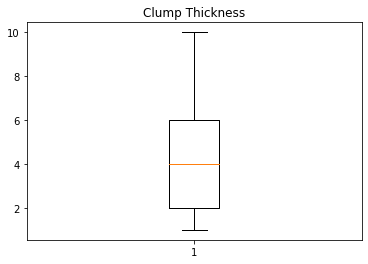

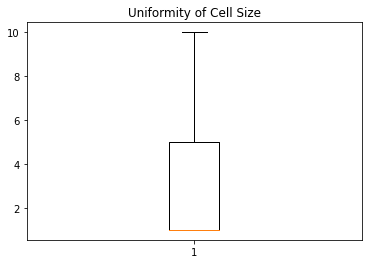

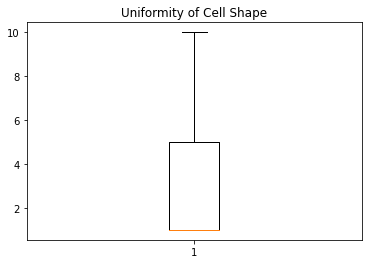

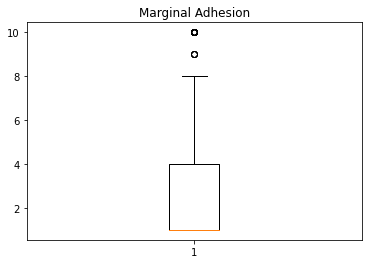

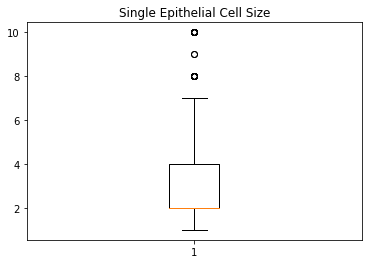

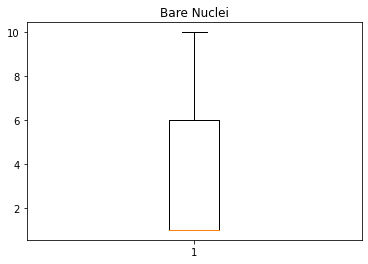

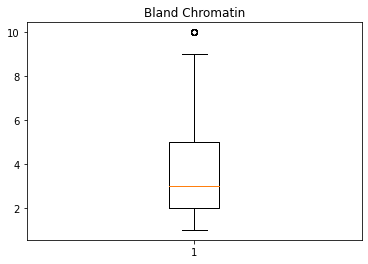

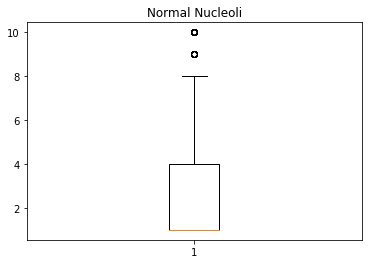

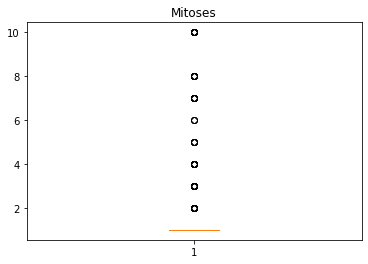

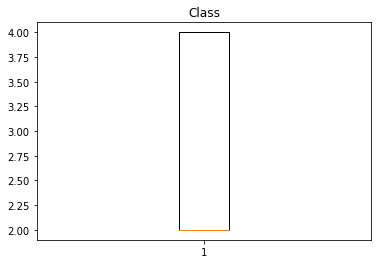

In [5]:
for j in list2:
  plt.boxplot(df[j])
  plt.title(j)
  plt.show()

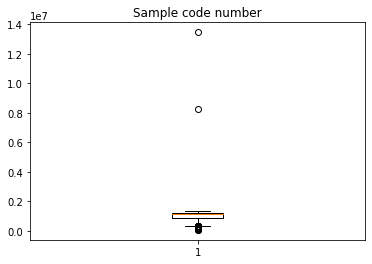

In [6]:
plt.boxplot(df['Sample code number'])
plt.title('Sample code number')
plt.show()

Dropping the first column from dataset

In [7]:
df.drop('Sample code number', axis = 1, inplace = True)

Splitting dataset into features (X) and labels (y)

In [8]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

Splitting the dataset into training and test data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

Building a logistic regression model

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Performing K-fold cross validation

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [12]:
scores

array([0.99090909, 0.94495413, 0.95412844, 0.95412844, 1.        ])

Predicting values on test dataset

In [13]:
y_pred = lr.predict(X_test)

Evaluating the predictions made by model on the test dataset

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9416058394160584

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[80,  2],
       [ 6, 49]])